In [4]:
import os, sys, glob
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import pickle

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
grid_path = 'G:\Il mio Drive\Colab Notebooks\LANL\grids\grid_04.pkl'

(0, 50)

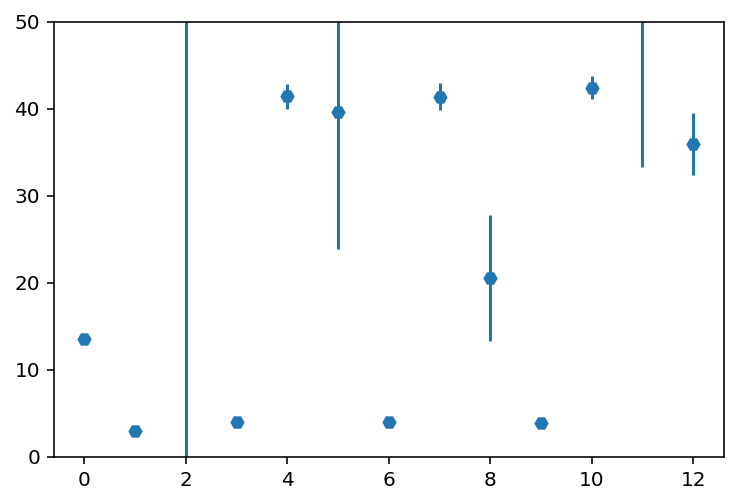

In [68]:
with open(grid_path, 'rb') as f:
    df = pickle.load(f)

test_model_index = np.arange(df.shape[0])
test_model_loss_mean = df.best_model_results.apply(np.mean)
test_model_loss_std = df.best_model_results.apply(np.std)

plt.errorbar(test_model_index, test_model_loss_mean, test_model_loss_std, fmt='H')
plt.ylim(0,50)

In [58]:
df.shape

(11, 27)

In [26]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('df', 3798),
 ('grid_path', 213),
 ('f', 176),
 ('test_model_loss_mean', 128),
 ('test_model_loss_std', 128),
 ('test_model_index', 108),
 ('np', 80),
 ('pd', 80),
 ('plt', 80),
 ('sp', 80)]